# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
for city_name in cities[:70]:
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    content = requests.get(url).json()
    print(content)
    break

{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 300.44, 'feels_like': 301.52, 'temp_min': 300.44, 'temp_max': 300.44, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 5.87, 'deg': 41}, 'rain': {'3h': 0.13}, 'clouds': {'all': 12}, 'dt': 1578254961, 'sys': {'country': 'LK', 'sunrise': 1578271606, 'sunset': 1578313752}, 'timezone': 19800, 'id': 1242110, 'name': 'Kalmunai', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data = []
for i,city_name in enumerate(cities[:70], start =1):
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    content = requests.get(url).json()
    if int(content['cod']) ==404:
        print('City not found')
        continue
    print('Processing city number {}: name {}'.format(i, city_name))
    weather_data.append([content['name'], content['clouds']['all'], content['sys']['country'], content['dt'],
                         content['main']['humidity'], content['coord']['lat'], content['coord']['lon'],
                         content['main']['temp_max'], content['wind']['speed']])
df = pd.DataFrame(weather_data, columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])
import_csv = df.to_csv(r"C:\Users\rando04\Desktop\my_dir\python-api-challenge\Weather_data.csv")
print(df)

Processing city number 1: name kalmunai
Processing city number 2: name ushuaia
Processing city number 3: name barrow
Processing city number 4: name rawson
Processing city number 5: name aklavik
Processing city number 6: name yarmouth
Processing city number 7: name vaini
Processing city number 8: name bako
Processing city number 9: name odienne
Processing city number 10: name hambantota
Processing city number 11: name port elizabeth
Processing city number 12: name severo-kurilsk
Processing city number 13: name teguise
Processing city number 14: name kudahuvadhoo
Processing city number 15: name bluff
Processing city number 16: name busselton
Processing city number 17: name channel-port aux basques
Processing city number 18: name buala
Processing city number 19: name punta arenas
Processing city number 20: name masterton
Processing city number 21: name hamilton
Processing city number 22: name takoradi
Processing city number 23: name fortuna
Processing city number 24: name chabahar
Process

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature')

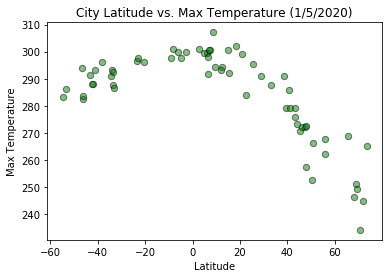

In [11]:
x_city_latitude = df.loc[:,'Lat']
y_max_temp = df.loc[:,'Max Temp']
plt.scatter(x_city_latitude, y_max_temp,marker = "o", c = "green", edgecolors = "black", s = 40, alpha = 0.5)
plt.title('City Latitude vs. Max Temperature (1/5/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

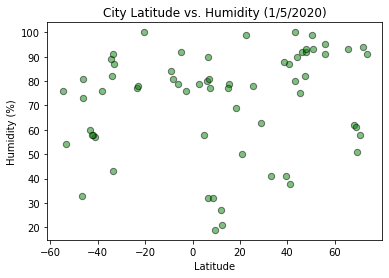

In [13]:
x_city_latitude = df.loc[:,'Lat']
y_humidity = df.loc[:,'Humidity']

plt.scatter(x_city_latitude, y_humidity, marker = "o", c = "green", edgecolors = "black", s = 40, alpha = 0.5)

plt.title('City Latitude vs. Humidity (1/5/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

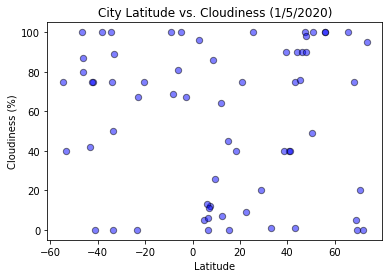

In [16]:
x_city_latitude = df.loc[:,'Lat']
y_cloud = df.loc[:,'Cloudiness']

plt.scatter(x_city_latitude, y_cloud, marker = "o", c = "blue", edgecolors = "black", s = 40, alpha = 0.5)

plt.title('City Latitude vs. Cloudiness (1/5/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

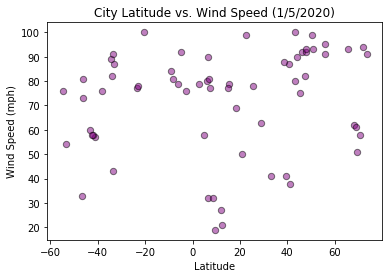

In [17]:
x_city_latitude = df.loc[:,'Lat']
y_wind = df.loc[:,'Wind Speed']

plt.scatter(x_city_latitude, y_humidity, marker = "o", c = "purple", edgecolors = "black", s = 40, alpha = 0.5)

plt.title('City Latitude vs. Wind Speed (1/5/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')